# Stock Market API


## Imports

In [1]:
import numpy as np
import pandas as pd
import requests
import pprint

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 6) # Set default figsize for all notebook (usefull in TS analysis)

## Creating the dataframe in pandas

For this exercise we are going to work with the **last 3 months of Apple stock prices**. We will obtein this information from the **IEXCloud API**.  \
You can find this information here in the documentation: https://iexcloud.io/docs/api/#historical-prices

In [2]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [3]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [4]:
apple_df = create_stock_df_of_company('aapl')
display(apple_df.head(2))
apple_df.info()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-05-22,174.20,174.710,173.450,173.98,2023-05-22,AAPL,43570932,HISTORICAL_PRICES,AAPL,,...,43570932,173.511,173.731,174.239,172.983,43570932,"May 22, 23",0.00,0.0000,aapl
2023-05-23,171.56,173.379,171.275,173.13,2023-05-23,AAPL,50747263,HISTORICAL_PRICES,AAPL,,...,50747263,172.663,171.098,172.912,170.813,50747263,"May 23, 23",-2.64,-0.0152,aapl


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-05-22 to 2023-08-18
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   close                 62 non-null     float64
 1   high                  62 non-null     float64
 2   low                   62 non-null     float64
 3   open                  62 non-null     float64
 4   priceDate             62 non-null     object 
 5   symbol                62 non-null     object 
 6   volume                62 non-null     int64  
 7   id                    62 non-null     object 
 8   key                   62 non-null     object 
 9   subkey                62 non-null     object 
 10  updated               62 non-null     int64  
 11  changeOverTime        62 non-null     float64
 12  marketChangeOverTime  62 non-null     float64
 13  uOpen                 62 non-null     float64
 14  uClose                62 non-null     float64
 15  uHigh

## Initial plot of the evolution of stock prices

,Closing Prices
date,
2023-05-22,174.20
2023-05-23,171.56
2023-05-24,171.84
2023-05-25,172.99
2023-05-26,175.43
...,...
2023-08-14,179.46
2023-08-15,177.45
2023-08-16,176.57


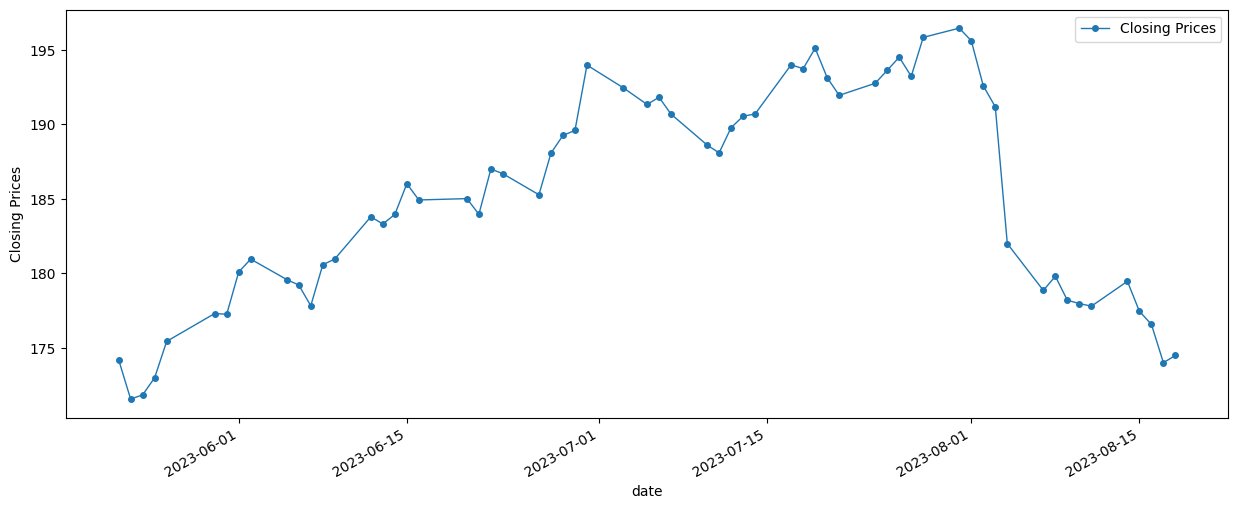

In [5]:
# apple_df = apple_df.set_index(apple_df["date"], drop=True, append=False, inplace=False, verify_integrity=False)


apple_df_3m = apple_df['close'].to_frame(name="Closing Prices")
display(apple_df_3m)



apple_df_3m.plot( marker='o', linewidth=1, markersize=4)
matplotlib.pyplot.ylabel(ylabel= "Closing Prices")
matplotlib.pyplot.legend()

Now we can make a plot with the **values in the open, close, high, and low** columns

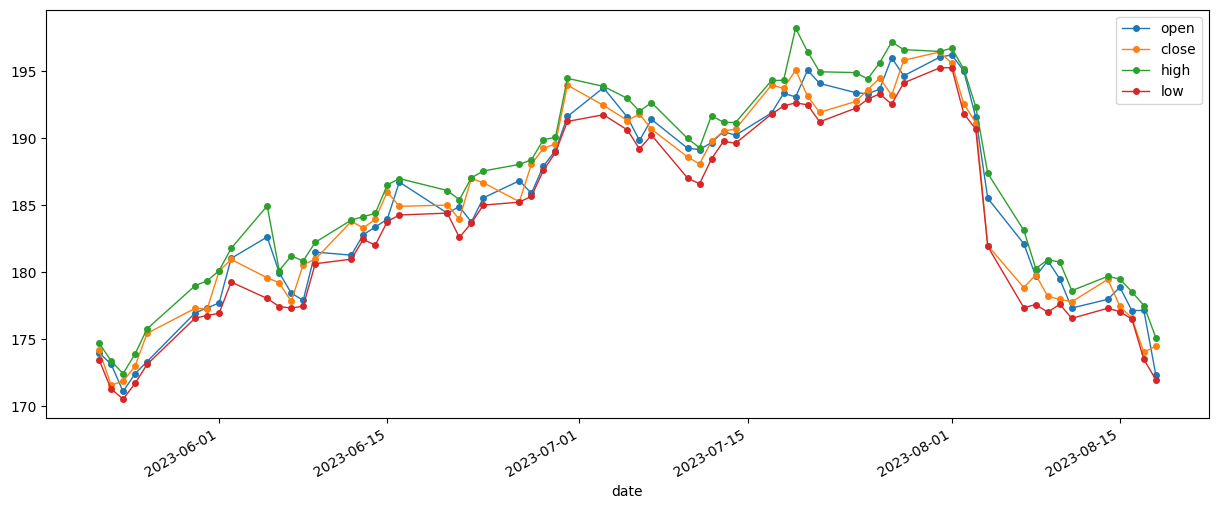

In [6]:
apple_df[['open','close','high', 'low']].plot( marker='o', linewidth=1, markersize=4)
matplotlib.pyplot.legend()

##  Lets analize other companies

- Amazon stock prices: https://cloud.iexapis.com/stable/stock/amzn/chart/ytd?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Meta (Facebook) market cap: https://cloud.iexapis.com/stable/stock/meta/stats/marketcap?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Apple research and development spendings quarterly: https://cloud.iexapis.com/stable/stock/aapl/financials?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The last news about Tesla: https://cloud.iexapis.com/stable/stock/tsla/news/last/1?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The performance of the ‘Energy’ sector: https://cloud.iexapis.com/stable/stock/market/sector-performance?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad

Lets try to automatize this process for a group of companies.

In [7]:
codes = ['amzn', 'googl', 'meta']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

stock_dfs
print(f"""
{type(stock_dfs) = }
{len(stock_dfs) = }
-------------
{type(stock_dfs[0]) = }
{len(stock_dfs[0]) = }
""")


type(stock_dfs) = <class 'list'>
len(stock_dfs) = 4
-------------
type(stock_dfs[0]) = <class 'pandas.core.frame.DataFrame'>
len(stock_dfs[0]) = 62



In [9]:
stocks_df = pd.concat(stock_dfs)
display(stocks_df.head())
stocks_df_ = stocks_df.loc[:,['uClose','company_code']]
stocks_df_

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2023-05-22,174.20,174.710,173.450,173.98,2023-05-22,AAPL,43570932,HISTORICAL_PRICES,AAPL,,...,43570932,173.511,173.731,174.239,172.983,43570932,"May 22, 23",0.00,0.0000,aapl
2023-05-23,171.56,173.379,171.275,173.13,2023-05-23,AAPL,50747263,HISTORICAL_PRICES,AAPL,,...,50747263,172.663,171.098,172.912,170.813,50747263,"May 23, 23",-2.64,-0.0152,aapl
2023-05-24,171.84,172.418,170.520,171.09,2023-05-24,AAPL,45143488,HISTORICAL_PRICES,AAPL,,...,45143488,170.629,171.377,171.954,170.060,45143488,"May 24, 23",0.28,0.0016,aapl
2023-05-25,172.99,173.895,171.690,172.41,2023-05-25,AAPL,56058258,HISTORICAL_PRICES,AAPL,,...,56058258,171.945,172.524,173.426,171.227,56058258,"May 25, 23",1.15,0.0067,aapl
2023-05-26,175.43,175.770,173.110,173.32,2023-05-26,AAPL,54834975,HISTORICAL_PRICES,AAPL,,...,54834975,172.853,174.957,175.296,172.643,54834975,"May 26, 23",2.44,0.0141,aapl


,uClose,company_code
date,,
2023-05-22,174.20,aapl
2023-05-23,171.56,aapl
2023-05-24,171.84,aapl
2023-05-25,172.99,aapl
2023-05-26,175.43,aapl
...,...,...
2023-08-14,306.19,meta
2023-08-15,301.95,meta
2023-08-16,294.29,meta


company_code,aapl,amzn,googl,meta
date,,,,
2023-05-22,174.20,115.01,125.05,248.32
2023-05-23,171.56,114.99,122.56,246.74
2023-05-24,171.84,116.75,120.90,249.21
2023-05-25,172.99,115.00,123.48,252.69
2023-05-26,175.43,120.11,124.61,262.04
...,...,...,...,...
2023-08-14,179.46,140.57,131.33,306.19
2023-08-15,177.45,137.67,129.78,301.95
2023-08-16,176.57,135.07,128.70,294.29


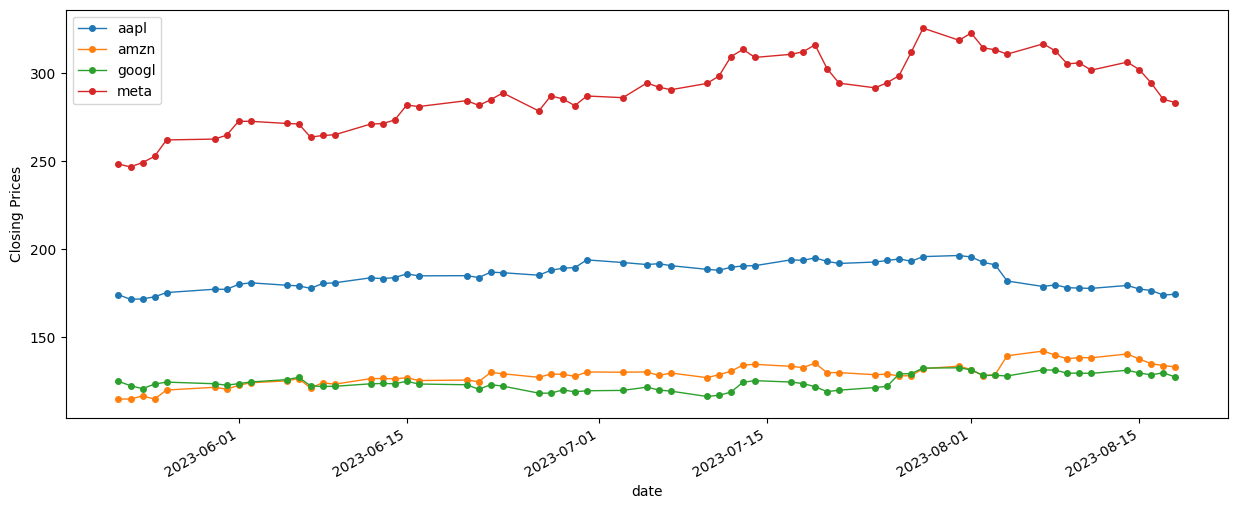

In [14]:
# Pivot the table to get company_code as columns
pivot_df_ = stocks_df.pivot(columns='company_code', values='close')
display(pivot_df_)

pivot_df_.plot(marker='o', linewidth=1, markersize=4)
matplotlib.pyplot.ylabel(ylabel= "Closing Prices")
matplotlib.pyplot.legend()